<a href="https://colab.research.google.com/github/gulabpatel/Statistics/blob/main/06%3A%20Statistical_Thinking_Know_your_Data_and_Business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Walkthrough video of the following code : https://www.youtube.com/watch?v=V91ayczTbJ4&list=PL3N9eeOlCrP6IjkyExZW9oZFwt-A1r0qB&index=4


Dataset : https://www.kaggle.com/wordsforthewise/lending-club

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)


import pandas as pd
import numpy as np
import gzip
import csv
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls -alrt '/content/drive/MyDrive/dataset'

total 438751
-rw------- 1 root root  56694779 Jan  1 02:18 lc_loans.csv
-rw------- 1 root root      3452 May  7 09:43 loan_analysis_summary.csv
-rw------- 1 root root 392582231 May  7 12:08 accepted_2007_to_2018Q4.csv_2.gz


In [4]:
loan_ddf = pd.read_csv('/content/drive/MyDrive/dataset/accepted_2007_to_2018Q4.csv_2.gz', compression='gzip', error_bad_lines=False)

In [5]:
loan_ddf.shape[0]

2260701

In [7]:
# take a subset of the dataset to avoid the colab crash
loan_df = loan_ddf[0:100000]

In [8]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


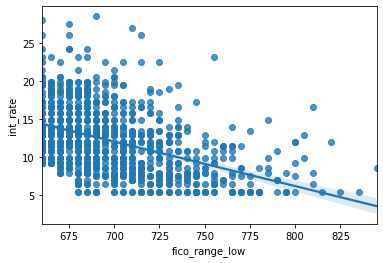

In [9]:
sns.regplot(x='fico_range_low',y='int_rate',data=loan_df[:1000]) 

In [10]:
loan_df['loan_status'].value_counts()

Fully Paid            70288
Charged Off           17603
Current               11402
Late (31-120 days)      441
In Grace Period         199
Late (16-30 days)        66
Default                   1
Name: loan_status, dtype: int64

In [11]:
loan_int_df=loan_df[loan_df['loan_status']!='Current']
loan_int_df=loan_int_df[loan_df['loan_status']!='Late (31-120 days)']
loan_int_df=loan_int_df[loan_df['loan_status']!='In Grace Period']
loan_int_df=loan_int_df[loan_df['loan_status']!='Late (16-30 days)']

In [12]:
loan_int_df['loan_status'].value_counts()

Fully Paid     70288
Charged Off    17603
Default            1
Name: loan_status, dtype: int64

In [13]:
loan_int_df.groupby('loan_status').agg({'last_fico_range_high':'mean'})

,last_fico_range_high
loan_status,
Charged Off,563.817133
Default,594.000000
Fully Paid,704.772294


In [14]:
loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Charged Off','Default')
loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Fully Paid','Good')

In [15]:
loan_int_df['loan_status'].value_counts()

Good       70288
Default    17604
Name: loan_status, dtype: int64

In [16]:
loan_int_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87892 entries, 0 to 99998
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 101.9+ MB


In [17]:
loan_int_df['fico_range_low'].min()

660.0

In [18]:
loan_int_df['fico_range_low'].max()

845.0

In [19]:
loan_int_df['last_fico_range_low'].min()

0.0

In [20]:
loan_int_df['last_fico_range_low']=loan_int_df.apply(lambda x: x['fico_range_low'] if x['last_fico_range_low']==0.0 else x['last_fico_range_low'],axis=1)

In [21]:
loan_int_df['last_fico_range_low'].min()

500.0

In [22]:
loan_int_df['last_fico_range_low'].max()

845.0

In [23]:
import math
loan_int_df['fico_score']=loan_int_df['last_fico_range_low'].apply(lambda x: int(math.ceil(x/10))*10)

In [24]:
loan_int_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_score
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,...,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,560
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,...,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,700
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,...,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,700
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,...,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,700
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,300xx,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,NaN,NaN,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,...,12798.0,9400.0,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,760


In [25]:
loan_int_df.isnull().sum()

id                           0
member_id                87892
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
                         ...  
settlement_date          84972
settlement_amount        84972
settlement_percentage    84972
settlement_term          84972
fico_score                   0
Length: 152, dtype: int64

In [26]:
loan_int_df[loan_df['dti'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_score
18202,66415476,NaN,20000.0,20000.0,20000.0,36 months,16.99,712.96,D,D3,NaN,NaN,MORTGAGE,0.0,Not Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,760xx,TX,NaN,0.0,Jul-2001,685.0,689.0,1.0,NaN,NaN,7.0,0.0,7161.0,88.4,11.0,w,0.0,0.0,...,8715.0,7200.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,650
65620,65199509,NaN,3700.0,3700.0,3700.0,36 months,12.59,123.94,C,C2,NaN,NaN,MORTGAGE,0.0,Not Verified,Nov-2015,Default,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,765xx,TX,NaN,2.0,Aug-1978,680.0,684.0,1.0,10.0,NaN,8.0,0.0,10649.0,56.9,20.0,f,0.0,0.0,...,24521.0,400.0,20167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,540


In [27]:
loan_int_df['dti_final']=loan_int_df.apply(lambda x: x['dti_joint'] if pd.isnull(x['dti']) else x['dti'], axis=1)
loan_int_df['annual_inc_final']=loan_int_df.apply(lambda x: x['annual_inc_joint'] if x['annual_inc']==0.0 else x['annual_inc'], axis=1)

In [28]:
loan_int_df.isnull().sum()

id                           0
member_id                87892
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
                         ...  
settlement_percentage    84972
settlement_term          84972
fico_score                   0
dti_final                    0
annual_inc_final             0
Length: 154, dtype: int64

In [29]:
loan_int_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_score,dti_final,annual_inc_final
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,...,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,560,5.91,55000.0
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,...,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,700,16.06,65000.0
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,...,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,700,10.78,63000.0
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,...,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,700,25.37,104433.0
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,300xx,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,NaN,NaN,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,...,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,760,10.20,34000.0


In [30]:
loan_int_df['fico_score'].value_counts().sort_index()

500     503
510    1122
520    1368
530    1531
540    1776
550    1773
560    1836
570    1792
580    1782
590    1586
600    1596
610    1668
620    1653
630    1808
640    2109
650    2582
660    3659
670    4687
680    5332
690    5666
700    5620
710    5492
720    5577
730    4736
740    3962
750    3319
760    2788
770    2459
780    2243
790    1867
800    1545
810    1153
820     779
830     379
840     125
850      19
Name: fico_score, dtype: int64

In [31]:
fico_df=loan_int_df['fico_score'].value_counts().sort_index()

In [32]:
fico_df.head()

500     503
510    1122
520    1368
530    1531
540    1776
Name: fico_score, dtype: int64

In [33]:
loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()

500     446
510     967
520    1168
530    1261
540    1395
550    1384
560    1354
570    1254
580    1155
590     916
600     810
610     759
620     594
630     471
640     405
650     312
660     587
670     671
680     549
690     328
700     254
710     188
720     138
730      67
740      55
750      41
760      24
770      12
780      11
790       8
800      12
810       5
820       1
830       2
Name: fico_score, dtype: int64

In [34]:
loan_int_df[['fico_score','dti_final','loan_amnt','annual_inc']].groupby('fico_score').agg({'dti_final':'mean', 'loan_amnt':'mean','annual_inc':'median'})

,dti_final,loan_amnt,annual_inc
fico_score,,,
500,19.764672,14521.272366,60000.0
510,19.998690,13642.134581,55000.0
520,20.420950,13970.614035,60000.0
530,20.231208,14430.519268,60000.0
540,20.661875,14116.497748,60000.0
550,21.079549,14750.028201,60000.0
560,20.933916,14948.883442,63000.0
570,20.616406,14774.930246,63000.0
580,20.969136,14524.186308,62000.0


In [35]:
loan_int_df[['fico_score','annual_inc','int_rate']].groupby('fico_score').mean()

,annual_inc,int_rate
fico_score,,
500,65731.236044,14.553777
510,64011.063093,14.554608
520,67408.905263,14.391140
530,70423.054102,14.739523
540,69924.361312,14.330394
550,71161.031117,14.185601
560,72395.414303,13.975790
570,71695.992824,13.910469
580,72305.214422,13.869080


In [36]:
fico_df=pd.concat([fico_df,pd.DataFrame(loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()),pd.DataFrame(loan_int_df[['fico_score','dti_final','loan_amnt','annual_inc']].groupby('fico_score').agg({'dti_final':'mean', 'loan_amnt':'mean','annual_inc':'median'})),pd.DataFrame(loan_int_df[['fico_score','annual_inc','int_rate']].groupby('fico_score').mean())], ignore_index=True, axis=1)

In [37]:
fico_df.head()

,0,1,2,3,4,5,6
500,503,446.0,19.764672,14521.272366,60000.0,65731.236044,14.553777
510,1122,967.0,19.998690,13642.134581,55000.0,64011.063093,14.554608
520,1368,1168.0,20.420950,13970.614035,60000.0,67408.905263,14.391140
530,1531,1261.0,20.231208,14430.519268,60000.0,70423.054102,14.739523
540,1776,1395.0,20.661875,14116.497748,60000.0,69924.361312,14.330394


In [38]:
fico_df=fico_df.reset_index()

In [39]:
fico_df.columns = ['fico_score','loan_total','default_total','dti','avg_loan_amnt','median_annual_inc','avg_annual_inc','int_rate']

In [40]:
fico_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate
0,500,503,446.0,19.764672,14521.272366,60000.0,65731.236044,14.553777
1,510,1122,967.0,19.998690,13642.134581,55000.0,64011.063093,14.554608
2,520,1368,1168.0,20.420950,13970.614035,60000.0,67408.905263,14.391140
3,530,1531,1261.0,20.231208,14430.519268,60000.0,70423.054102,14.739523
4,540,1776,1395.0,20.661875,14116.497748,60000.0,69924.361312,14.330394


In [41]:
fico_df['default_rate']=(fico_df.default_total/fico_df.default_total.sum())*100
fico_df['actual_default_rate']=(fico_df.default_total/fico_df.loan_total.sum())*100

In [42]:
fico_df.head(20)

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,503,446.0,19.764672,14521.272366,60000.0,65731.236044,14.553777,2.533515,0.507441
1,510,1122,967.0,19.998690,13642.134581,55000.0,64011.063093,14.554608,5.493070,1.100214
2,520,1368,1168.0,20.420950,13970.614035,60000.0,67408.905263,14.391140,6.634856,1.328904
3,530,1531,1261.0,20.231208,14430.519268,60000.0,70423.054102,14.739523,7.163145,1.434715
4,540,1776,1395.0,20.661875,14116.497748,60000.0,69924.361312,14.330394,7.924335,1.587175
5,550,1773,1384.0,21.079549,14750.028201,60000.0,71161.031117,14.185601,7.861850,1.574660
6,560,1836,1354.0,20.933916,14948.883442,63000.0,72395.414303,13.975790,7.691434,1.540527
7,570,1792,1254.0,20.616406,14774.930246,63000.0,71695.992824,13.910469,7.123381,1.426751
8,580,1782,1155.0,20.969136,14524.186308,62000.0,72305.214422,13.869080,6.561009,1.314113
9,590,1586,916.0,21.274161,14508.086381,65000.0,72961.390820,13.789206,5.203363,1.042188


In [43]:
fico_df.describe()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
count,36.000000,36.000000,34.000000,36.000000,36.000000,36.000000,36.000000,36.000000,34.000000,34.000000
mean,675.000000,2441.444444,517.764706,18.880460,14882.605749,66093.583333,77381.424779,11.803889,2.941176,0.589092
std,105.356538,1663.572188,486.646350,1.664874,1616.845570,6870.100641,8026.320257,2.338604,2.764408,0.553687
min,500.000000,19.000000,1.000000,14.748880,12795.408582,55000.000000,64011.063093,7.168240,0.005681,0.001138
25%,587.500000,1541.500000,44.500000,17.687564,13967.481203,62000.000000,71562.252397,9.988799,0.252783,0.050630
50%,675.000000,1800.000000,425.500000,19.111413,14534.518955,65000.000000,75598.949964,12.618939,2.417064,0.484117
75%,762.500000,3404.000000,889.500000,20.301018,15221.122945,70000.000000,81312.545075,13.809174,5.052829,1.012038
max,850.000000,5666.000000,1395.000000,21.274161,19784.210526,85000.000000,96970.189974,14.739523,7.924335,1.587175


In [44]:
fico_df.to_csv('loan_analysis_summary.csv')

In [45]:
fico_df.corr()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.071474,-0.884677,-0.919147,0.680018,0.828385,0.824738,-0.975022,-0.884677,-0.884677
loan_total,0.071474,1.000000,-0.280431,0.097083,-0.472674,-0.148343,0.057189,0.091839,-0.280431,-0.280431
default_total,-0.884677,-0.280431,1.000000,0.872398,-0.418804,-0.699679,-0.763114,0.857459,1.000000,1.000000
dti,-0.919147,0.097083,0.872398,1.000000,-0.715443,-0.861145,-0.827226,0.954075,0.872398,0.872398
avg_loan_amnt,0.680018,-0.472674,-0.418804,-0.715443,1.000000,0.754054,0.550918,-0.801464,-0.418804,-0.418804
median_annual_inc,0.828385,-0.148343,-0.699679,-0.861145,0.754054,1.000000,0.931928,-0.874371,-0.699679,-0.699679
avg_annual_inc,0.824738,0.057189,-0.763114,-0.827226,0.550918,0.931928,1.000000,-0.822662,-0.763114,-0.763114
int_rate,-0.975022,0.091839,0.857459,0.954075,-0.801464,-0.874371,-0.822662,1.000000,0.857459,0.857459
default_rate,-0.884677,-0.280431,1.000000,0.872398,-0.418804,-0.699679,-0.763114,0.857459,1.000000,1.000000
actual_default_rate,-0.884677,-0.280431,1.000000,0.872398,-0.418804,-0.699679,-0.763114,0.857459,1.000000,1.000000


-------------------------